In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import numpy as np

In [3]:
from zipfile import ZipFile
import os
csv_path = "C://Users//Sukanya//Downloads//Thiru.csv"

df = pd.read_csv(csv_path)

In [4]:
df.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windspeed,winddir,sealevelpressure,cloudcover,visibility,sunrise,sunset,moonphase,icon
0,"Thiruvananthapuram,In",01/01/2018,89.0,75.6,82.4,99.9,75.6,87.2,73.8,76.15,8.1,180.8,1009.2,32.2,3.1,2018-01-01T06:36:33,2018-01-01T18:14:46,0.50,partly-cloudy-day
1,"Thiruvananthapuram,In",02/01/2018,89.2,75.0,81.9,99.9,75.0,87.8,75.3,80.86,8.1,189.9,1008.8,38.1,2.7,2018-01-02T06:36:57,2018-01-02T18:15:18,0.50,partly-cloudy-day
2,"Thiruvananthapuram,In",03/01/2018,88.9,76.0,82.5,99.9,76.0,87.7,74.6,77.74,9.2,231.2,1010.0,39.3,2.9,2018-01-03T06:37:21,2018-01-03T18:15:49,0.52,partly-cloudy-day
3,"Thiruvananthapuram,In",04/01/2018,89.2,75.2,82.1,95.9,75.2,85.7,71.9,72.11,8.1,149.9,1010.5,33.9,3.2,2018-01-04T06:37:45,2018-01-04T18:16:21,0.54,partly-cloudy-day
4,"Thiruvananthapuram,In",05/01/2018,89.7,75.6,81.7,93.8,75.6,84.0,70.0,68.91,9.2,162.5,1009.8,33.5,2.8,2018-01-05T06:38:07,2018-01-05T18:16:52,0.58,partly-cloudy-day


In [5]:
df.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windspeed,winddir,sealevelpressure,cloudcover,visibility,sunrise,sunset,moonphase,icon
0,"Thiruvananthapuram,In",01/01/2018,89.0,75.6,82.4,99.9,75.6,87.2,73.8,76.15,8.1,180.8,1009.2,32.2,3.1,2018-01-01T06:36:33,2018-01-01T18:14:46,0.50,partly-cloudy-day
1,"Thiruvananthapuram,In",02/01/2018,89.2,75.0,81.9,99.9,75.0,87.8,75.3,80.86,8.1,189.9,1008.8,38.1,2.7,2018-01-02T06:36:57,2018-01-02T18:15:18,0.50,partly-cloudy-day
2,"Thiruvananthapuram,In",03/01/2018,88.9,76.0,82.5,99.9,76.0,87.7,74.6,77.74,9.2,231.2,1010.0,39.3,2.9,2018-01-03T06:37:21,2018-01-03T18:15:49,0.52,partly-cloudy-day
3,"Thiruvananthapuram,In",04/01/2018,89.2,75.2,82.1,95.9,75.2,85.7,71.9,72.11,8.1,149.9,1010.5,33.9,3.2,2018-01-04T06:37:45,2018-01-04T18:16:21,0.54,partly-cloudy-day
4,"Thiruvananthapuram,In",05/01/2018,89.7,75.6,81.7,93.8,75.6,84.0,70.0,68.91,9.2,162.5,1009.8,33.5,2.8,2018-01-05T06:38:07,2018-01-05T18:16:52,0.58,partly-cloudy-day


In [6]:
df['icon'].value_counts()

partly-cloudy-day    847
rain                 613
cloudy                 1
Name: icon, dtype: int64

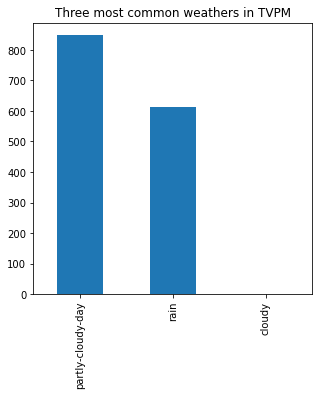

In [50]:
plt.figure(figsize=(5,5))
df['icon'].value_counts().head(3).plot(kind='bar')

plt.title('Three most common weathers in TVPM')
plt.show()

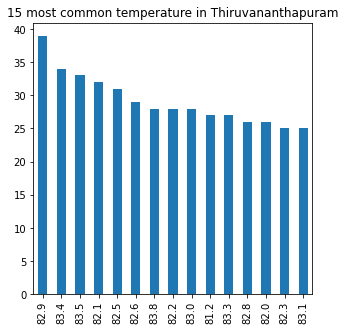

In [51]:
plt.figure(figsize=(5,5))
df['temp'].value_counts().head(15).plot(kind='bar')

plt.title('15 most common temperature in Thiruvananthapuram')
plt.show()

C:\Users\Sukanya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


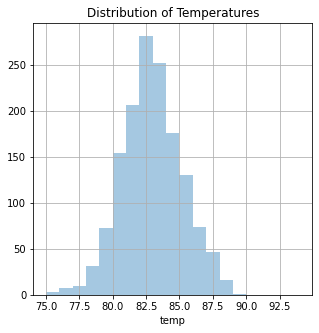

In [9]:
plt.figure(figsize=(5, 5))
sns.distplot(df['temp'],bins=[i for i in range(75,95,1)], kde=False)
plt.title("Distribution of Temperatures")
plt.grid()
plt.show()

In [10]:
data = df
data['datetime'] = pd.to_datetime(data['datetime'])
data.dtypes

name                        object
datetime            datetime64[ns]
tempmax                    float64
tempmin                    float64
temp                       float64
feelslikemax               float64
feelslikemin               float64
feelslike                  float64
dew                        float64
humidity                   float64
windspeed                  float64
winddir                    float64
sealevelpressure           float64
cloudcover                 float64
visibility                 float64
sunrise                     object
sunset                      object
moonphase                  float64
icon                        object
dtype: object

In [11]:
data_f = data[['datetime','temp']]
data_f.dropna(inplace=True)

C:\Users\Sukanya\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [12]:
x = data_f['datetime']
y = data_f['temp']



In [13]:
def get_month(x):
  return x[5:7]
def get_year(x):
  return x[0:4]

In [14]:
df['year'] = df['datetime'].apply(lambda x: get_year(str(x)))
df['month'] = df['datetime'].apply(lambda x: get_month(str(x)))

In [15]:
df['year']


0       2018
1       2018
2       2018
3       2018
4       2018
        ... 
1456    2021
1457    2021
1458    2021
1459    2021
1460    2021
Name: year, Length: 1461, dtype: object

In [16]:
temp_year = pd.crosstab(df['year'], df['month'], values=df['temp'], aggfunc='mean')

In [17]:
temp_year


month,01,02,03,04,05,06,07,08,09,10,11,12
year,,,,,,,,,,,,
2018,81.996774,83.089286,84.032258,84.296667,82.941935,81.350000,80.716129,80.322581,81.860000,81.945161,82.596667,82.900000
2019,82.829032,84.535714,85.503226,85.566667,85.338710,83.416667,81.483871,81.696774,82.066667,81.141935,82.956667,82.432258
2020,82.951613,83.679310,84.874194,85.130000,84.012903,83.066667,82.574194,83.500000,81.950000,82.832258,83.520000,83.264516
2021,82.625806,83.964286,84.670968,84.343333,82.451613,82.703333,82.022581,81.583871,81.896667,81.748387,80.820000,82.538710


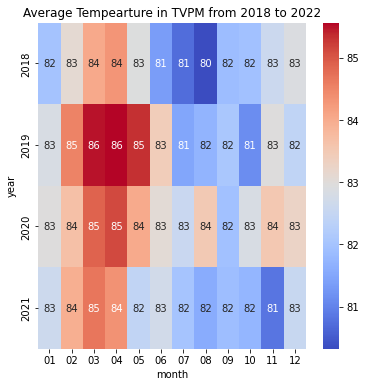

In [55]:
plt.figure(figsize=(6,6))
sns.heatmap(temp_year, cmap='coolwarm', annot=True)
plt.title("Average Tempearture in TVPM from 2018 to 2022")
plt.show()

In [19]:
df['humidity'].isna().sum()

0

In [20]:
humidity_year = pd.crosstab(df['year'], df['month'], values=df['humidity'], aggfunc='mean')

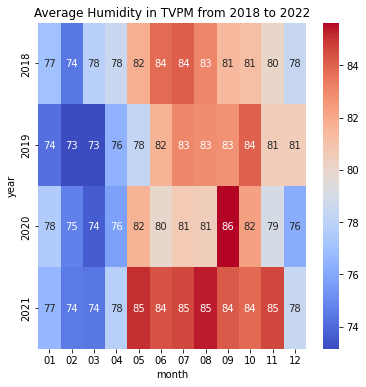

In [54]:
plt.figure(figsize=(6,6))
sns.heatmap(humidity_year, cmap='coolwarm', annot=True)
plt.title("Average Humidity in TVPM from 2018 to 2022")
plt.show()

In [22]:
# taking only temperature feature as values and datetime feature as index in the dataframe for time series forecasting of temperature
data = pd.DataFrame(list(df['temp']), index=df['datetime'], columns=['temp'])

In [23]:
a = data['temp']
a

datetime
2018-01-01    82.4
2018-02-01    81.9
2018-03-01    82.5
2018-04-01    82.1
2018-05-01    81.7
              ... 
2021-12-27    81.5
2021-12-28    81.7
2021-12-29    81.5
2021-12-30    82.6
2021-12-31    83.8
Name: temp, Length: 1461, dtype: float64

In [24]:
data = data.resample('D').mean()

In [25]:
data.temp.isna().sum()

0

In [26]:
data.fillna(data['temp'].mean(), inplace=True)

In [27]:
data.temp.isna().sum()

0

In [28]:
data

,temp
datetime,
2018-01-01,82.4
2018-01-02,82.9
2018-01-03,86.2
2018-01-04,85.3
2018-01-05,87.4
...,...
2021-12-27,81.5
2021-12-28,81.7
2021-12-29,81.5


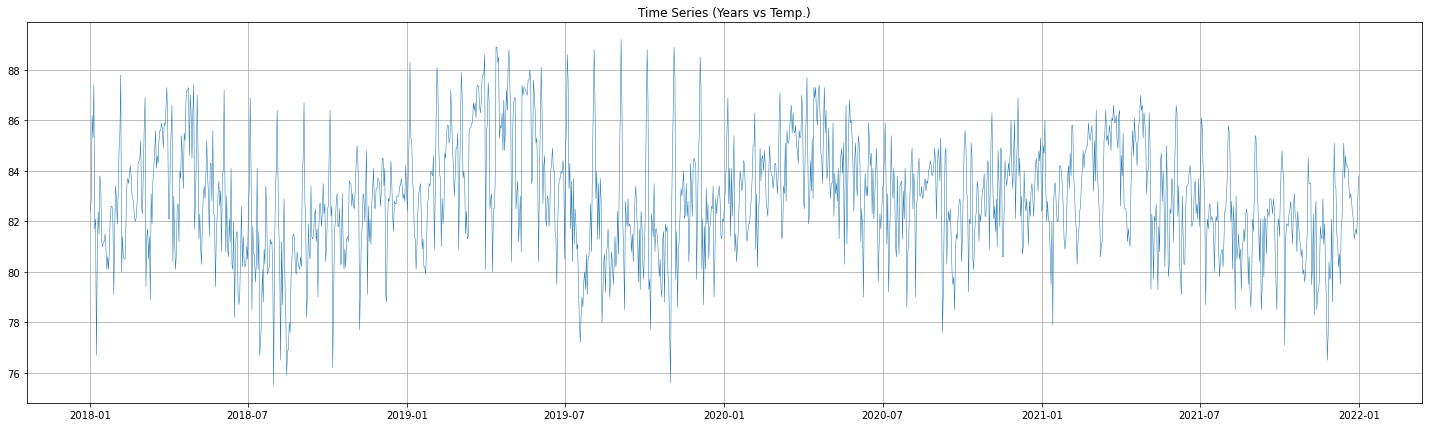

In [29]:
plt.figure(figsize=(25, 7))
plt.plot(data, linewidth=.5)
plt.grid()
plt.title("Time Series (Years vs Temp.)")
plt.show()

In [30]:
# Scaling data to get rid of outliers
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(-1,1))
data_scaled = scalar.fit_transform(data)

In [31]:
data

,temp
datetime,
2018-01-01,82.4
2018-01-02,82.9
2018-01-03,86.2
2018-01-04,85.3
2018-01-05,87.4
...,...
2021-12-27,81.5
2021-12-28,81.7
2021-12-29,81.5


In [33]:
data_scaled.shape

(1461, 1)

In [34]:
timestep = 30
X= []
Y=[]
for i in range(len(data_scaled)- (timestep)):
    X.append(data_scaled[i:i+timestep])
    Y.append(data_scaled[i+timestep])

In [36]:
X=np.asanyarray(X)
Y=np.asanyarray(Y)

In [37]:
k = 1029
Xtrain = X[:k,:,:]
Xtest = X[k:,:,:]    
Ytrain = Y[:k]    
Ytest= Y[k:] 

In [38]:
Xtrain.shape

(1029, 30, 1)

In [40]:
Xtest.shape

(402, 30, 1)

In [41]:
from tensorflow.keras.layers import Dense,RepeatVector, LSTM, Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.models import Sequential

In [42]:
from tensorflow.keras.layers import Bidirectional, Dropout


In [43]:
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(30,1)))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(30))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(Bidirectional(LSTM(128, activation='relu')))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
history = model.fit(Xtrain,Ytrain,epochs=10, verbose=1 )

Epoch 1/10
33/33 [==============================] - 33s 328ms/step - loss: 0.0938
Epoch 2/10
33/33 [==============================] - 10s 283ms/step - loss: 0.0734
Epoch 3/10
33/33 [==============================] - 9s 283ms/step - loss: 0.0609
Epoch 4/10
33/33 [==============================] - 9s 284ms/step - loss: 0.0531
Epoch 5/10
33/33 [==============================] - 9s 286ms/step - loss: 0.0515
Epoch 6/10
33/33 [==============================] - 9s 286ms/step - loss: 0.0480
Epoch 7/10
33/33 [==============================] - 10s 293ms/step - loss: 0.0452
Epoch 8/10
33/33 [==============================] - 10s 295ms/step - loss: 0.0481
Epoch 9/10
33/33 [==============================] - 10s 295ms/step - loss: 0.0442
Epoch 10/10
33/33 [==============================] - 10s 315ms/step - loss: 0.0442


In [44]:
model.save("./regressor.hdf5")

In [84]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 29, 256)           768       
                                                                 
 conv1d_1 (Conv1D)           (None, 28, 128)           65664     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 14, 128)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1792)              0         
                                                                 
 repeat_vector (RepeatVector  (None, 30, 1792)         0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 30, 100)           7

In [85]:
predict = model.predict(Xtest)

In [86]:
predict = scalar.inverse_transform(predict)

In [87]:
Ytesting = scalar.inverse_transform(Ytest)

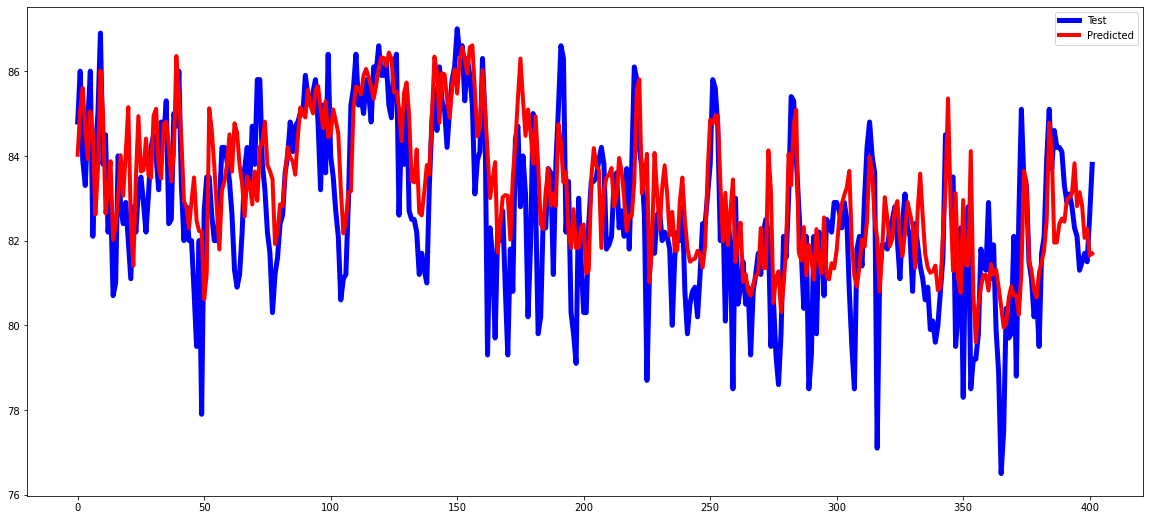

In [88]:
plt.figure(figsize=(20,9))
plt.plot(Ytesting , 'blue', linewidth=5)
plt.plot(predict,'r' , linewidth=4)
plt.legend(('Test','Predicted'))
plt.show()

In [89]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Ytesting, predict)

2.4744817102587415